In [1]:
#Assignment 3

In [127]:
#Libraries to be used

import numpy as mp
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, log_loss)
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [128]:
#Importing cancer and diabetes datasets from local directory

file_path1 = 'C:/Users/nicocorb/Downloads/ECGR4105/cancer.csv'
file_path2 = 'C:/Users/nicocorb/Downloads/ECGR4105/diabetes.csv'

df_cancer = pd.read_csv(file_path1)
df_diabetes = pd.read_csv(file_path2)

In [129]:
df_cancer.head() #Checking first 5 rows to ensure my cancer dataset imported correctly

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [130]:
df_diabetes.head() #Checking first 5 rows to ensrue my diabetes dataset imported correctly

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df_cancer.describe() #Cancer dataset parameter defintions 

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
df_diabetes.describe() #Diabetes dataset parameter definitions

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [138]:
#Function Definitions

#Train, Test and Split Function
def train_test_split(X, y):
    X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42, stratify=y)
    return X_train, X_test, y_train, y_test

#Scaling function
def scale_and_train(X_train, X_test, y_train, num_epochs):
    scaler = StandardScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    model = SGDClassifier(loss='log_loss', max_iter=1, learning_rate='constant', eta0=0.001, random_state=42, warm_start=True)
    accuracy_list = []
    loss_list = []
    for _ in range(num_epochs):
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=ConvergenceWarning)
            model.fit(scaled_X_train, y_train)
        y_training_predicted = model.predict(scaled_X_train)
        num_accuracy = accuracy_score(y_train, y_training_predicted)
        accuracy_list.append(num_accuracy)
        y_proba_train = model.predict_proba(scaled_X_train)
        loss = log_loss(y_train, y_proba_train)
        loss_list.append(loss)
    return model, accuracy_list, loss_list, scaled_X_test

#Scale and train with regularization
def scale_and_train_reg(X_train, X_test, y_train, num_epochs):
    scaler = StandardScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    model = SGDClassifier(loss='log_loss', max_iter=1, learning_rate='constant', eta0=0.01, penalty='l2', warm_start=True, random_state=42)
    accuracy_list = []
    loss_list = []
    for _ in range(num_epochs):
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=ConvergenceWarning)
            model.fit(scaled_X_train, y_train)
        y_training_predicted = model.predict(scaled_X_train)
        num_accuracy = accuracy_score(y_train, y_training_predicted)
        accuracy_list.append(num_accuracy)
        y_proba_train = model.predict_proba(scaled_X_train)
        loss = log_loss(y_train, y_proba_train)
        loss_list.append(loss)
    return model, accuracy_list, loss_list, scaled_X_test

#Scale and train with Naive Bayes model
def scale_train_Naive_Bayes(X_train, X_test, y_train):
    scaler = StandardScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    nb_model = GaussianNB()
    nb_model.fit(scaled_X_train, y_train)
    return nb_model, scaled_X_test, scaled_X_train

def eval_plot_Naive_Bayes(scaled_X_test, y_test, nb_model):
    y_pred = nb_model.predict(scaled_X_test)
    acc_nb = accuracy_score(y_test, y_pred)
    pre_nb = precision_score(y_test, y_pred)
    re_nb = recall_score(y_test, y_pred)
    f1_nb = f1_score(y_test, y_pred)
    print("Evaluation Metrics for Naive Bayes Model")
    print(f"Accuracy : {acc_nb: .4f}")
    print(f"Precision: {pre_nb:.4f}")
    print(f"Recall   : {re_nb:.4f}")
    print(f"F1 Score : {f1_nb:.4f}")
    metrics = {
    'Accuracy': acc_nb,
    'Precision': pre_nb,
    'Recall': re_nb,
    'F1 Score': f1_nb
    }

    # Plot charts
    plt.figure(figsize=(8, 5))
    plt.bar(metrics.keys(), metrics.values(), color=['skyblue', 'lightgreen', 'salmon', 'plum'])
    plt.ylim(0.8, 1.0)  # Optional: Set Y-axis for better visualization
    plt.title('Naive Bayes Classification Metrics')
    plt.ylabel('Score')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    for i, v in enumerate(metrics.values()):
        plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')
    plt.show()

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
    disp.plot(cmap='Blues')
    plt.title("Confusion Matrix - Naive Bayes")
    plt.grid(False)
    plt.show()

#Plotting function
def plot_data(loss_list, accuracy_list):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(loss_list, label='Loss')
    plt.title('Training Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Log Loss')
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.plot(accuracy_list, label='Accuracy', color='green')
    plt.title('Training Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    return

#Evalution metrics and confusion matrix plotting function
def eval_and_confusion(scaled_X_test, y_test, model):
    y_predict = model.predict(scaled_X_test)

    num_acc = accuracy_score(y_test, y_predict)
    num_prec = precision_score(y_test, y_predict)
    num_rec = recall_score(y_test, y_predict)
    num_f1 = f1_score(y_test, y_predict)
    
    print("Evaluation Metrics on Test Set")
    print(f"Accuracy : {num_acc:.4f}")
    print(f"Precision: {num_prec:.4f}")
    print(f"Recall   : {num_rec:.4f}")
    print(f"F1 Score : {num_f1:.4f}")
    
    # Plotting the confusion matrix
    cm = confusion_matrix(y_test, y_predict)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title("Confusion Matrix")
    plt.grid(False)
    plt.show()

def pca_Naive_Bayes(scaled_X_train, scaled_X_test, y_train, y_test):
    acc_pca = []
    pre_pca = []
    re_pca = []
    f1_pca = []
    K = range(1,31)
    for k in K:
        pca = PCA(n_components=k)
        X_trained_pca = pca.fit_transform(scaled_X_train)
        X_tested_pca = pca.transform(scaled_X_test)
        model = GaussianNB()
        model.fit(X_trained_pca, y_train)
        y_pred = model.predict(X_tested_pca)

        acc_pca.append(accuracy_score(y_test, y_pred))
        pre_pca.append(precision_score(y_test, y_pred))
        re_pca.append(recall_score(y_test, y_pred))
        f1_pca.append(f1_score(y_test, y_pred))

    plt.figure(figsize=(12, 8))
    plt.plot(K, acc_pca, label='Accuracy')
    plt.plot(K, pre_pca, label='Precision')
    plt.plot(K, re_pca, label='Recall')
    plt.plot(K, f1_pca, label='F1 Score')
    plt.xlabel('Number of Principal Components (K)')
    plt.ylabel('Score')
    plt.title('Naive Bayes Performance with PCA')
    plt.legend()
    plt.grid(True)
    plt.show()

def pca_lg_Naive_Bayes(scaled_X_train, scaled_X_test, y_train, y_test):
    acc_pca = []
    pre_pca = []
    re_pca = []
    f1_pca = []
    K = range(1,31)
    for k in K:
        pca = PCA(n_components=k)
        X_trained_pca = pca.fit_transform(scaled_X_train)
        X_tested_pca = pca.transform(scaled_X_test)
        model = LogisticRegression(max_iter=1000)
        model.fit(X_trained_pca, y_train)
        y_pred = model.predict(X_tested_pca)

        acc_pca.append(accuracy_score(y_test, y_pred))
        pre_pca.append(precision_score(y_test, y_pred))
        re_pca.append(recall_score(y_test, y_pred))
        f1_pca.append(f1_score(y_test, y_pred))

    plt.figure(figsize=(12, 8))
    plt.plot(K, acc_pca, label='Accuracy')
    plt.plot(K, pre_pca, label='Precision')
    plt.plot(K, re_pca, label='Recall')
    plt.plot(K, f1_pca, label='F1 Score')
    plt.xlabel('Number of Principal Components (K)')
    plt.ylabel('Score')
    plt.title('Naive Bayes Performance with PCA')
    plt.legend()
    plt.grid(True)
    plt.show()

In [103]:
#Problem 1

X_diabetes = df_diabetes.drop('Outcome', axis=1) #Removing the outcome column from the input dataset
y_diabetes = df_diabetes['Outcome'] #Setting ouput dataset with a singular column of 0 or 1 outcome data

In [104]:
Xdt1, Xdt2, ydt1, ydt2 = train_test_split(X_diabetes, y_diabetes)

In [105]:
diabetes_model, acc_ls, loss_ls, sclxt = scale_and_train(Xdt1, Xdt2, ydt1, 100)

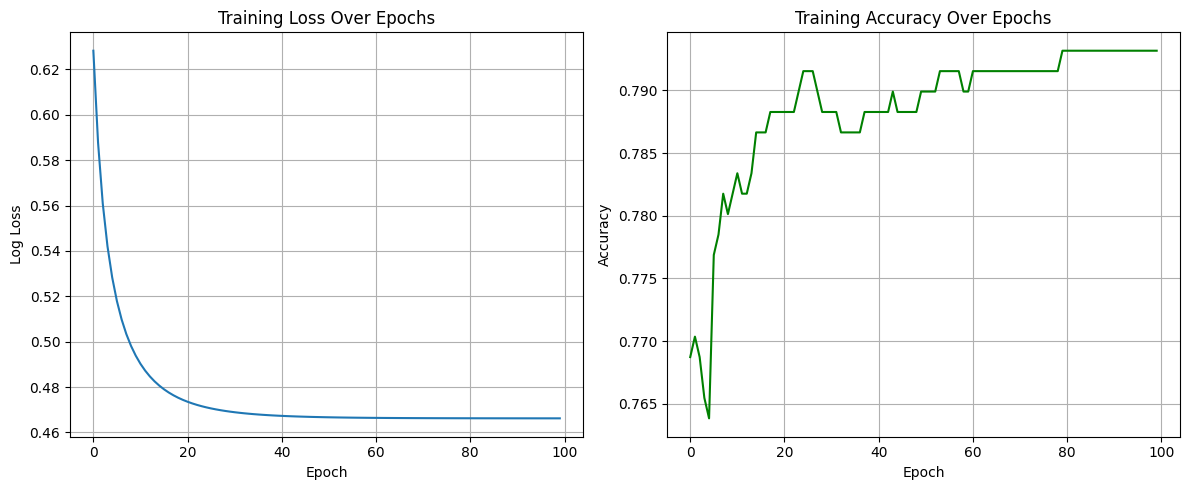

In [106]:
#plotting
plot_data(loss_ls, acc_ls)

Evaluation Metrics on Test Set
Accuracy : 0.7143
Precision: 0.6087
Recall   : 0.5185
F1 Score : 0.5600


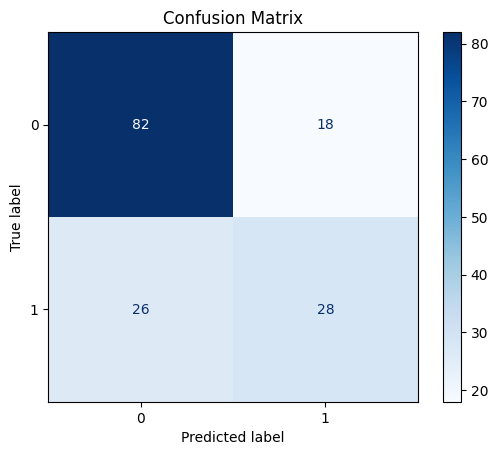

In [107]:
#Eval
eval_and_confusion(sclxt, ydt2, diabetes_model)

In [108]:
#Problem 2.1

#Dataset adjustment for input and output values
X_cancer = df_cancer.drop(['id', 'diagnosis', 'Unnamed: 32'], axis = 1)
y_cancer = df_cancer['diagnosis'].map({'M': 1, 'B': 0})

In [109]:
Xct1, Xct2, yct1, yct2 = train_test_split(X_cancer, y_cancer)

In [110]:
cancer_model, acc_ls2, loss_ls2, sclxt2 = scale_and_train(Xct1, Xct2, yct1, 100)

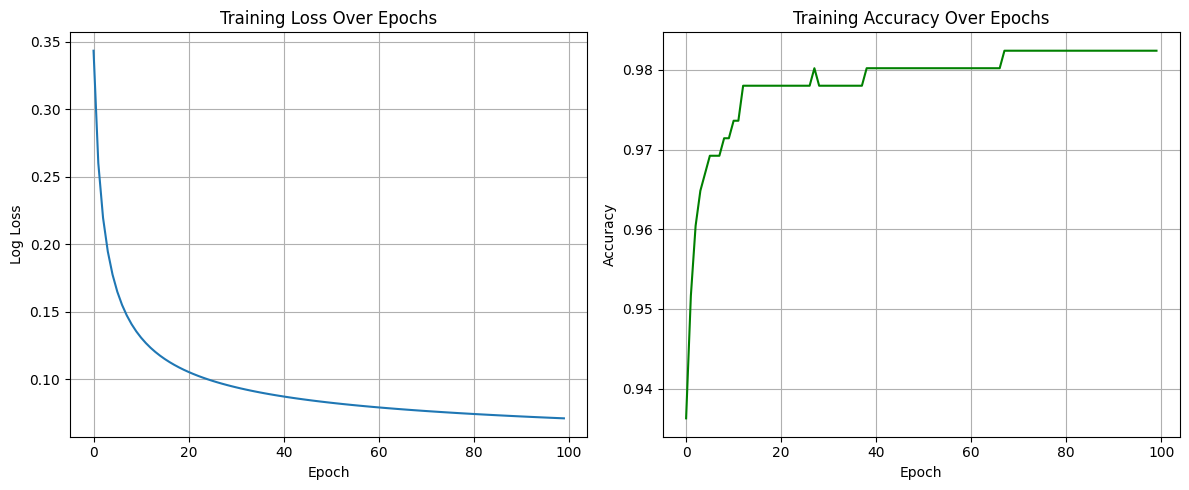

In [111]:
#plotting
plot_data(loss_ls2, acc_ls2)

Evaluation Metrics on Test Set
Accuracy : 0.9825
Precision: 1.0000
Recall   : 0.9524
F1 Score : 0.9756


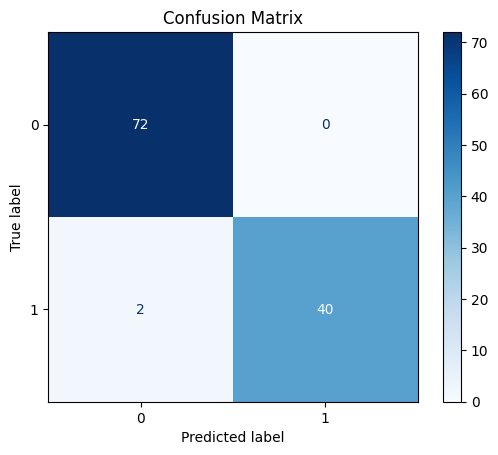

In [112]:
#Eval
eval_and_confusion(sclxt2, yct2, cancer_model)

In [113]:
#Problem 2.2

In [114]:
#Adjusting training model with regularization(scaling)
cancer_model_2, acc_ls2_2, loss_ls2_2, sclxt2_2 = scale_and_train_reg(Xct1, Xct2, yct1, 100)

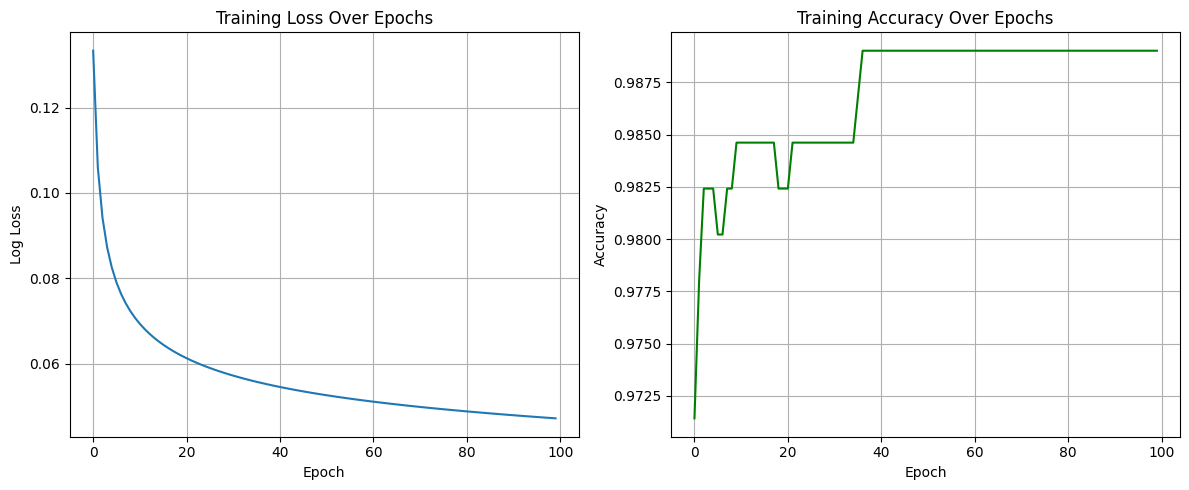

In [115]:
#Plotting new data with regularization
plot_data(loss_ls2_2, acc_ls2_2)

Evaluation Metrics on Test Set
Accuracy : 0.9737
Precision: 0.9756
Recall   : 0.9524
F1 Score : 0.9639


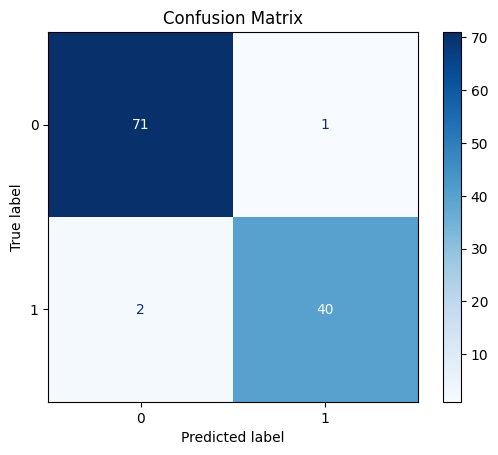

In [116]:
#Eval with regularization
eval_and_confusion(sclxt2_2, yct2_2, cancer_model_2)

In [124]:
#Problem 3
cancer_nb_model, xstnb, xstnb2 = scale_train_Naive_Bayes(Xct1, Xct2, yct1)

Evaluation Metrics for Naive Bayes Model
Accuracy :  0.9211
Precision: 0.9231
Recall   : 0.8571
F1 Score : 0.8889


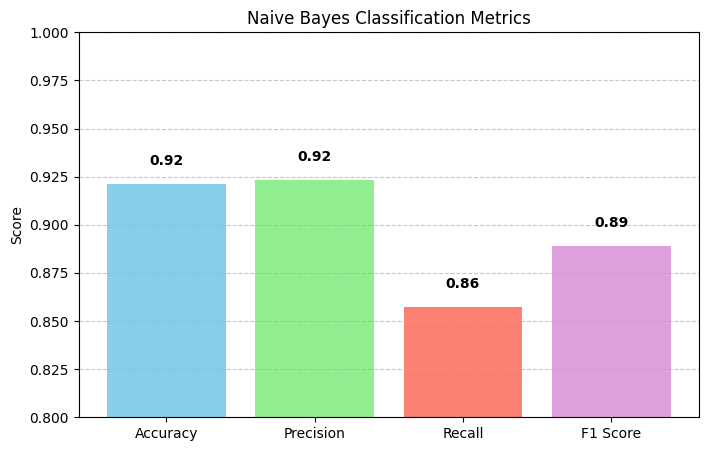

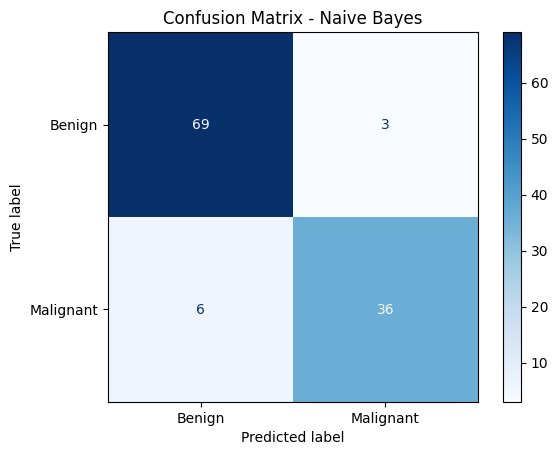

In [125]:
eval_plot_Naive_Bayes(xstnb, yct2, cancer_nb_model)

In [119]:
#Problem 4

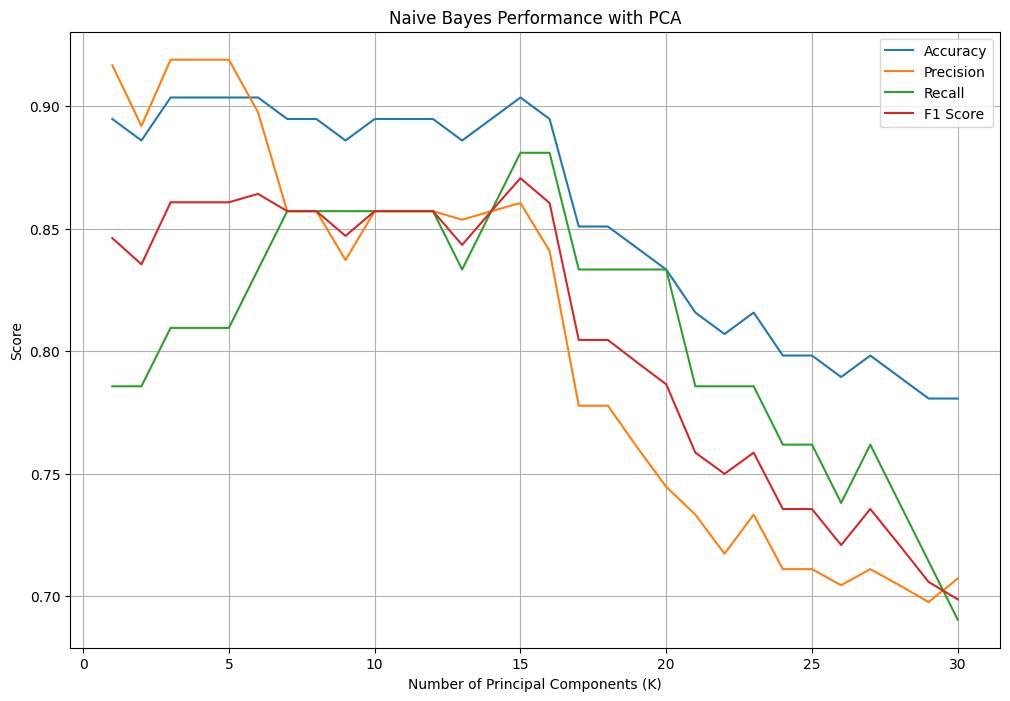

In [135]:
pca_Naive_Bayes(xstnb2, xstnb, yct1, yct2)

In [136]:
#Problem 5

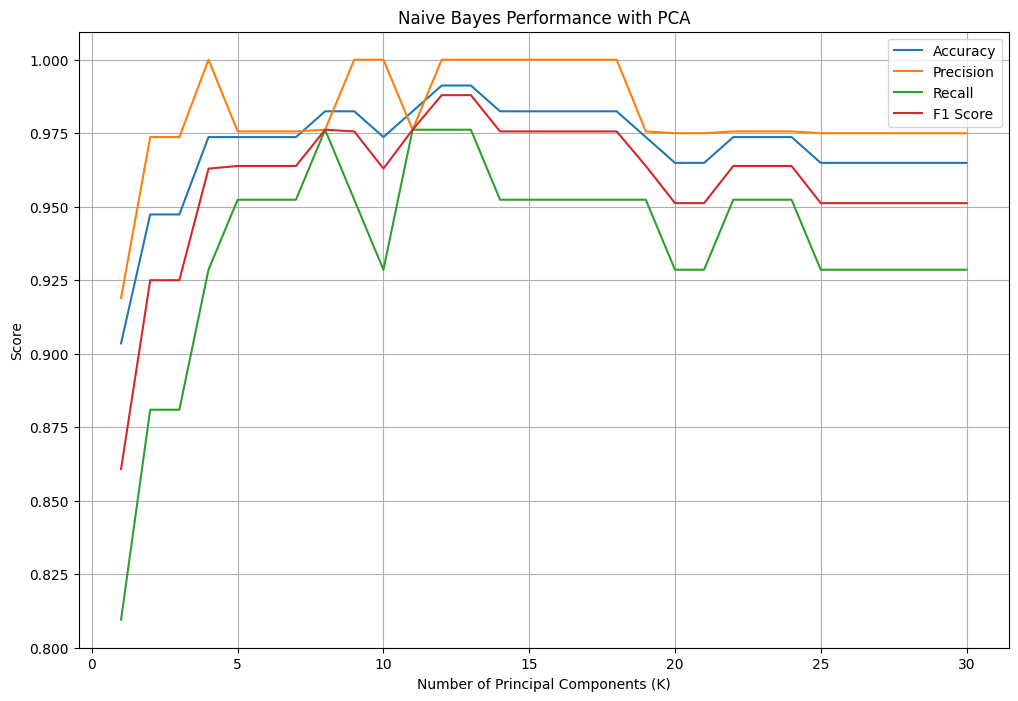

In [139]:
pca_lg_Naive_Bayes(xstnb2, xstnb, yct1, yct2)